# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

OLUWAFEMI BABATUNDE

# Project

## <span id="1"></span> ** 1. Overview **

Input Variables:
- **fixed acidity: ** most acids involved with wine or fixed or nonvolatile
- **volatile acidity: ** the amount of acetic acid in wine
- **citric acid: ** found in small quantities, citric acid can add 'freshness' and flavor to wines 
- **residual sugar: ** the amount of sugar remaining after fermentation stops
- **chlorides: ** the amount of salt in the wine
- **free sulfur dioxide: ** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- **total sulfur dioxide: ** amount of free and bound forms of S02
- **density: ** the density of water is close to that of water depending on the percent alcohol and sugar content
- **pH: ** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- **sulphates: ** a wine additive which can contribute to sulfur dioxide gas (S02) levels 
- **alcohol: ** the percent alcohol content of the wine<br>

Output Variable:
- **quality: ** output variable (based on sensory data, score between 0 and 10)

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('winequality.txt')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## <span id="3"></span> ** 3. Data Visualization and Preprocessing **

In [3]:
#checking if theres any missing value in the dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
#using the value_count function to check for the range of value in the quality column
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
#classifying the wine quality as good or bad on its quality
#'BAD' or 0, if quality of wine lies in the range (3,6.5)(inclusive)
#'GOOD' or 1, if quality of wine lies in the range (6.5,8)(inclusive)

bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['quality'] = pd.cut(x = dataset['quality'], bins = bins, labels = labels)

In [ ]:
#we can also use this method to classify into good or bad

#dataset['quality']=dataset['quality'].apply(lambda x: 1 if x>6.5 else 0)
dataset.head()

In [5]:
dataset['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [9]:
#here we encode the string to numeric

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['quality'] = labelencoder_y.fit_transform(dataset['quality'])

In [10]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


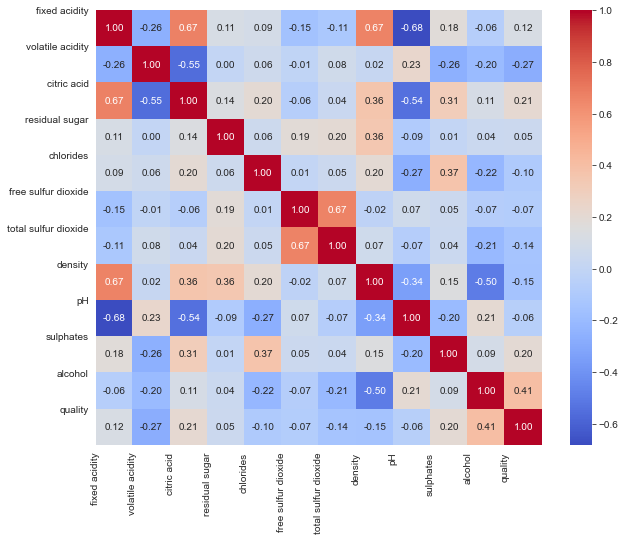

In [11]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

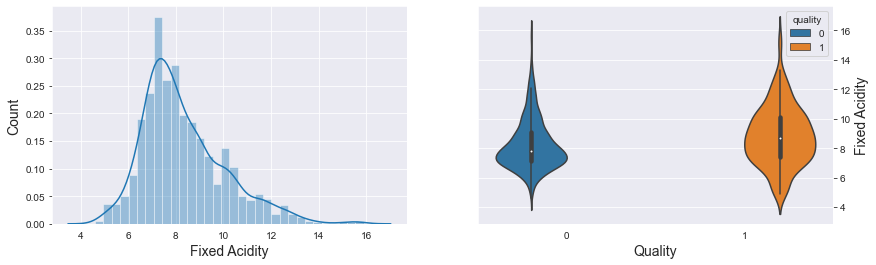

In [12]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['fixed acidity'], ax = axes[0])
axes[0].set_xlabel('Fixed Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'fixed acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Fixed Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

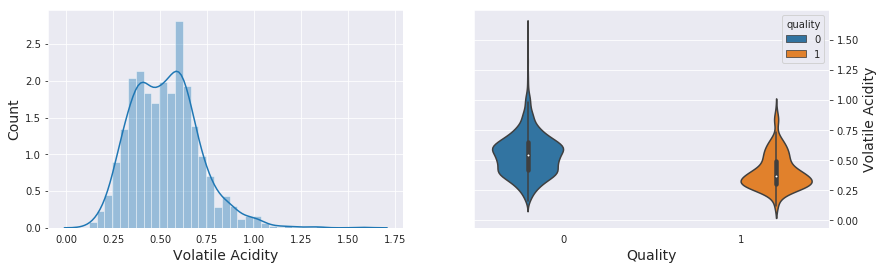

In [10]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['volatile acidity'], ax = axes[0])
axes[0].set_xlabel('Volatile Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'volatile acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Volatile Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

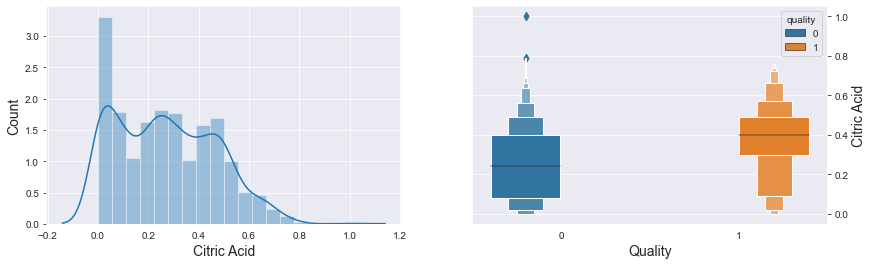

In [13]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['citric acid'], ax = axes[0])
axes[0].set_xlabel('Citric Acid', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'citric acid', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Citric Acid', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

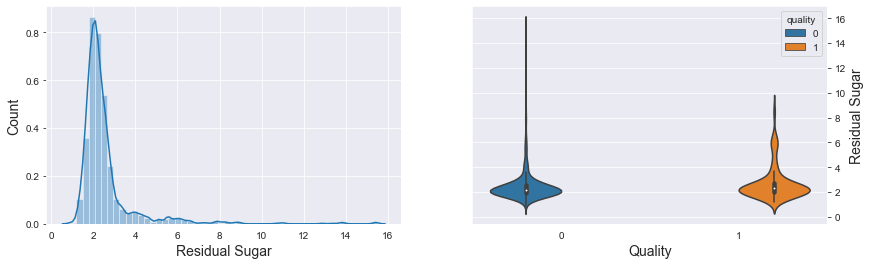

In [14]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['residual sugar'], ax = axes[0])
axes[0].set_xlabel('Residual Sugar', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'residual sugar', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Residual Sugar', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

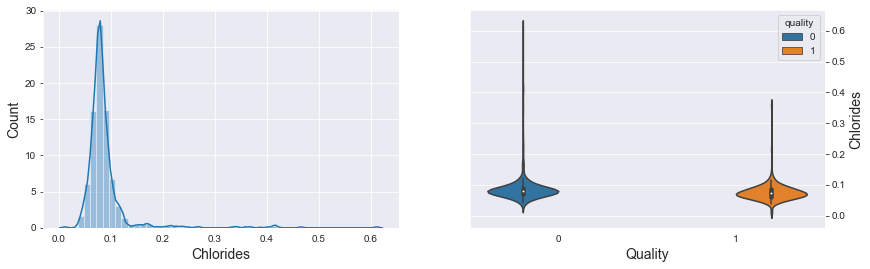

In [15]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['chlorides'], ax = axes[0])
axes[0].set_xlabel('Chlorides', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'chlorides', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Chlorides', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

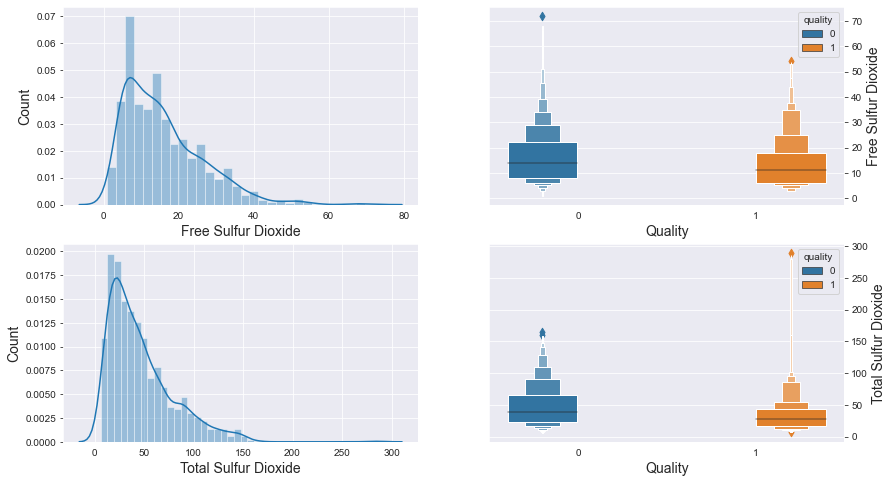

In [16]:
f, axes = plt.subplots(2,2,figsize=(14,8))

sns.distplot(dataset['free sulfur dioxide'], ax = axes[0,0])
axes[0,0].set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes[0,0].set_ylabel('Count', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'free sulfur dioxide', data = dataset, hue = 'quality',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=14)
axes[0,1].set_ylabel('Free Sulfur Dioxide', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.distplot(dataset['total sulfur dioxide'], ax = axes[1,0])
axes[1,0].set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes[1,0].set_ylabel('Count', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'total sulfur dioxide', data = dataset, hue = 'quality',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=14)
axes[1,1].set_ylabel('Total Sulfur Dioxide', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

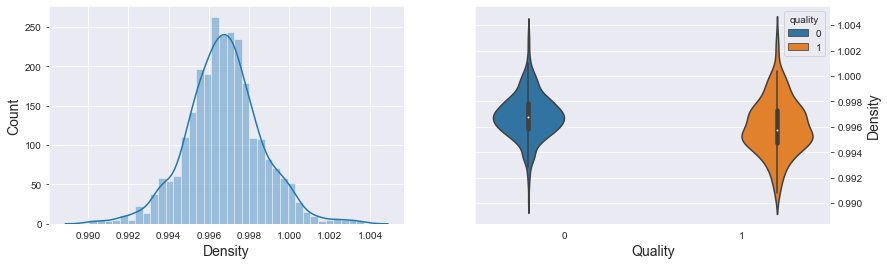

In [17]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['density'], ax = axes[0])
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'density', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

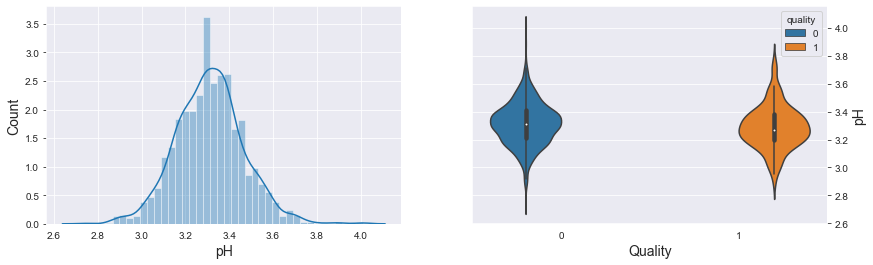

In [18]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

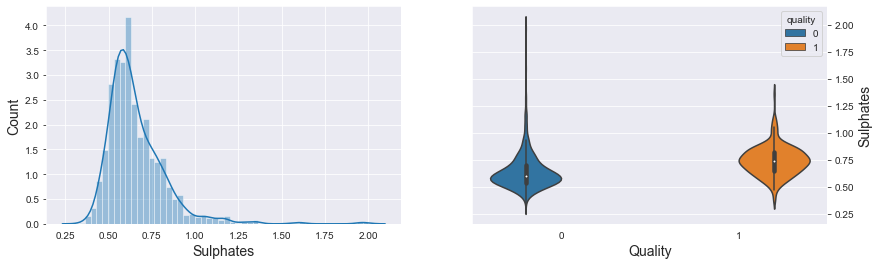

In [19]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['sulphates'], ax = axes[0])
axes[0].set_xlabel('Sulphates', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'sulphates', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Sulphates', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

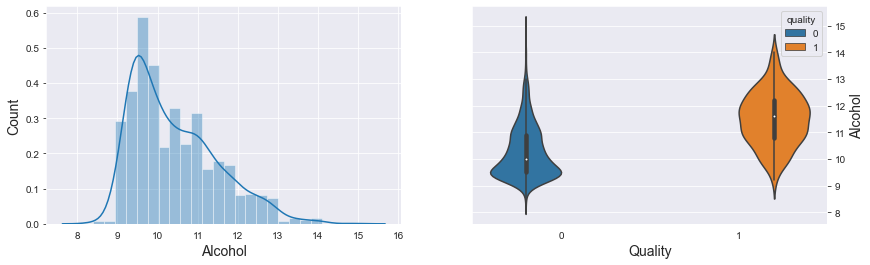

In [20]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['alcohol'], ax = axes[0])
axes[0].set_xlabel('Alcohol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'alcohol', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Alcohol', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [21]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [22]:
X = dataset.drop('quality', axis = 1).values
y = dataset['quality'].values.reshape(-1,1)

In [25]:
y


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


## <span id="4"></span> ** 4. Classification Models **

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### <span id="5"></span> ** Logistic Regression **

In [29]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [30]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.885857529527559
Training set:  0.8858483189992181
Test set:  0.865625


In [31]:
confusion_matrix(y_test, y_pred_lr_test)

array([[264,   9],
       [ 34,  13]], dtype=int64)

In [32]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

### <span id="6"></span> ** K-Nearest Neighbors (K-NN) **

In [33]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [34]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.9022699311023622
Training set:  1.0
Test set:  0.89375


In [35]:
confusion_matrix(y_test, y_pred_knn_test)

array([[264,   9],
       [ 25,  22]], dtype=int64)

In [36]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]

### <span id="7"></span> ** Support Vector Machine (SVM - Linear) **

In [37]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(X_train_scaled, y_train.ravel())

SVC(kernel='linear')

In [38]:
# Predicting Cross Validation Score
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_linear.mean())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train_scaled)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test_scaled)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

CV:  0.8670829232283465
Training set:  0.8670836591086787
Test set:  0.853125


In [39]:
confusion_matrix(y_test, y_pred_svm_linear_test)

array([[273,   0],
       [ 47,   0]], dtype=int64)

In [40]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]

### <span id="8"></span> ** Support Vector Machine (SVM - Kernel) **

In [41]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
classifier_svm_kernel.fit(X_train_scaled, y_train.ravel())

SVC(C=10)

In [42]:
# Predicting Cross Validation Score
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_kernel.mean())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train_scaled)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test_scaled)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

CV:  0.8999261811023622
Training set:  0.9421422986708365
Test set:  0.89375


In [43]:
confusion_matrix(y_test, y_pred_svm_kernel_test)

array([[261,  12],
       [ 22,  25]], dtype=int64)

In [44]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]

### <span id="9"></span> ** Naive Bayes **

In [45]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_scaled, y_train.ravel())

GaussianNB()

In [46]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train_scaled)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.8373462106299213
Training set:  0.8389366692728695
Test set:  0.846875


In [47]:
confusion_matrix(y_test, y_pred_nb_test)

array([[234,  39],
       [ 10,  37]], dtype=int64)

In [48]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

### <span id="10"></span> ** Decision Tree Classification **

In [49]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [50]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8960014763779528
Training set:  1.0
Test set:  0.878125


In [51]:
confusion_matrix(y_test, y_pred_dt_test)

array([[252,  21],
       [ 18,  29]], dtype=int64)

In [52]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

### <span id="11"></span> ** Random Forest Classification **

In [53]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [54]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9140194389763779
Training set:  1.0
Test set:  0.9125


In [55]:
confusion_matrix(y_test, y_pred_rf_test)

array([[267,   6],
       [ 22,  25]], dtype=int64)

In [56]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

## <span id="12"></span> ** 6. Measuring The Error **

In [57]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('SVM (Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test, cv_svm_linear.mean()),
          ('SVM (Kernel)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test, cv_svm_kernel.mean()),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

In [58]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,264,9,13,34,0.885848,0.865625,0.885858
1,K-Nearest Neighbors (KNN),264,9,22,25,1.000000,0.893750,0.902270
2,SVM (Linear),273,0,0,47,0.867084,0.853125,0.867083
3,SVM (Kernel),261,12,25,22,0.942142,0.893750,0.899926
4,Naive Bayes,234,39,37,10,0.838937,0.846875,0.837346
5,Decision Tree Classification,252,21,29,18,1.000000,0.878125,0.896001
6,Random Forest Tree Classification,267,6,25,22,1.000000,0.912500,0.914019


### <span id="13"></span> ** Visualizing Models Performance **

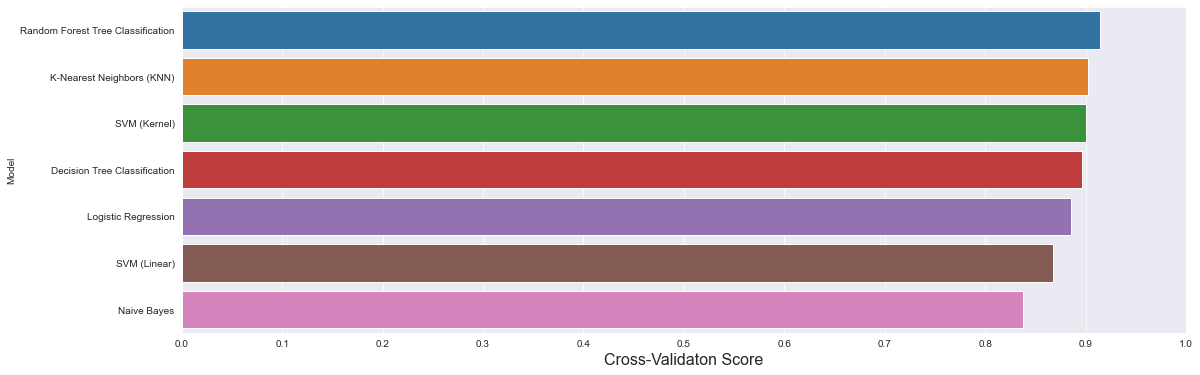

In [59]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

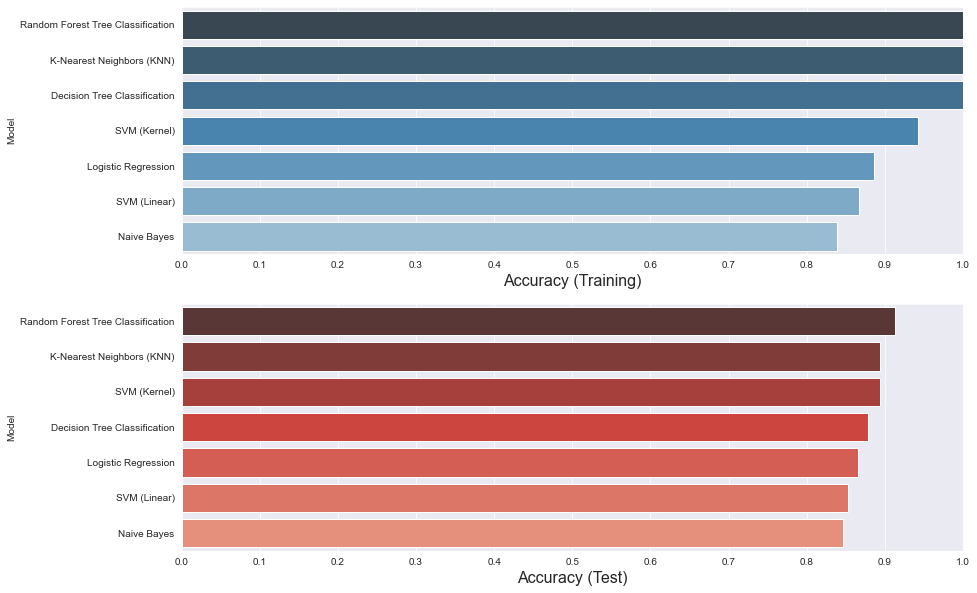

In [60]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

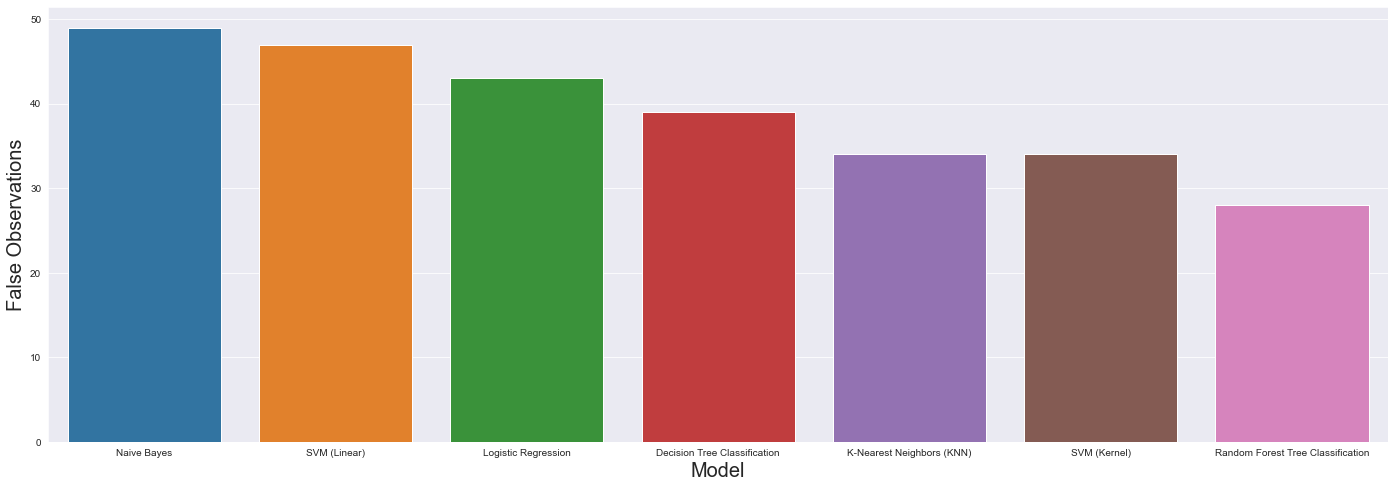

In [61]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

## <span id="14"></span> ** 7. Conclusion **

By Looking into the details, we can see that good quality wines have higher levels of alcohol on average, have lower volatile acidity on average, higher levels of sulphates on average and higher levels of residual sugar on average.